In [ ]:
# Install gym-snake env
!git clone https://github.com/simonandras/gym-snake
%cd gym-snake/
!pip install -e .

Cloning into 'gym-snake'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 479 (delta 12), reused 16 (delta 8), pack-reused 453
Receiving objects: 100% (479/479), 67.03 KiB | 377.00 KiB/s, done.
Resolving deltas: 100% (242/242), done.
/content/gym-snake
Obtaining file:///content/gym-snake
  Running setup.py develop for gym-snake


In [ ]:
import gym
import gym_snake
from gym_snake.algorithms.agent import Agent 

In [ ]:
env = gym.make('snake-v0', shape=(16, 16))

In [ ]:
agent = Agent(env=env,
              long_term_memory_capacity=1_000_000,
              short_term_memory_capacity=2,
              exploration_fraction=0.15,
              gamma=0.99,
              batch_size=32,
              number_of_epochs=1,
              lr=0.00025,
              rho=0.95,
              epsilon=0.01)

In [ ]:
agent.learn(number_of_episodes=4000, replay_size=32, verbose=0)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

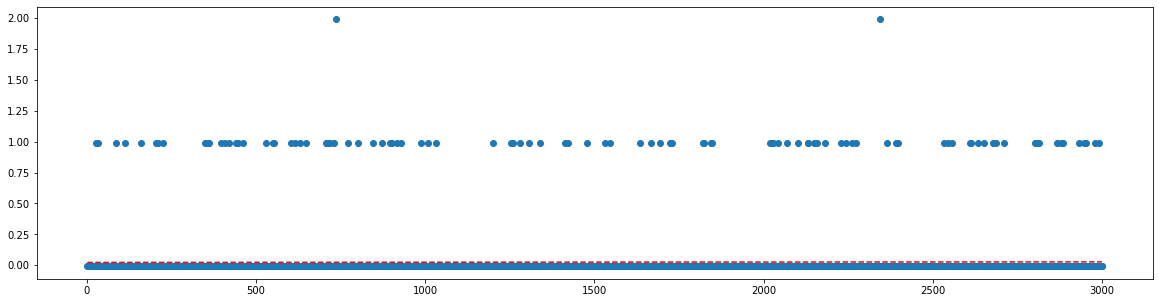

In [ ]:
plt.figure(figsize=(20, 5))
x=list(range(1, len(agent.reward_history) + 1))
y=agent.reward_history
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x),"r--")
plt.show()

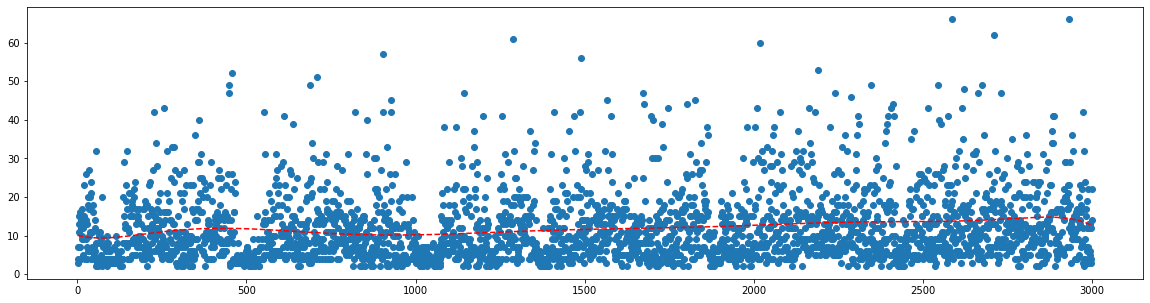

In [ ]:
plt.figure(figsize=(20, 5))
x=list(range(1, len(agent.length_history) + 1))
y=agent.length_history
plt.scatter(x, y)
z = np.polyfit(x, y, 10)
p = np.poly1d(z)
plt.plot(x, p(x),"r--")
plt.show()

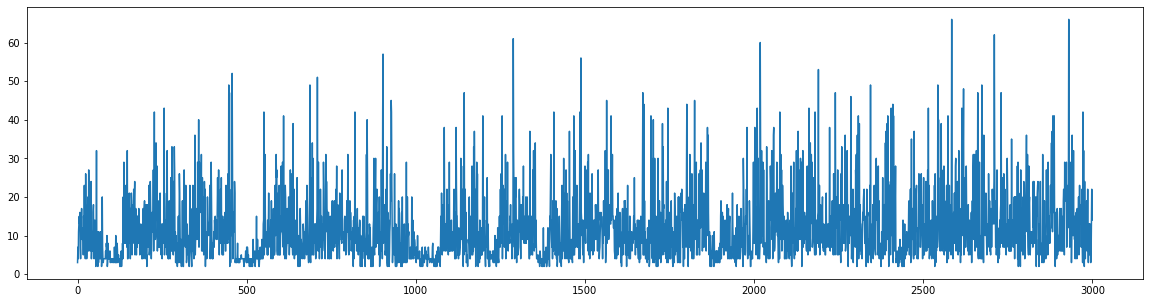

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(agent.length_history)
plt.show()

In [ ]:
agent.brain.model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2, 16, 16)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 8, 8)          1056      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 4, 4)          8256      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 4, 4)          16448     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                